In [1]:
import random
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]    # če grafi preveliki, pomanjšaj ti dve števili

In [2]:
# pomožna funkcija za računanje evklidske razdalje

def razdalja(tocka0, tocka1):
    """
    Izračuna evklidsko razdaljo med danima točkama.
    """
    # potencialno spremeni, da dela v R^n
    dx = tocka0[0] - tocka1[0]
    dy = tocka0[1] - tocka1[1]
    return (dx**2 + dy**2) ** (1/2)

In [11]:
class Kvadrat:
    """
    V enotskem kvadratu generiramo točke in opazujemo drevesa najkrjajših 
    poti v grafih, ki jih razpenjajo.
    """

    def __init__(self, st_tock, max_razdalja):
        """
        st_tock = število točk v enotskem kvadratu 
        """
        self.st_tock = st_tock
        #self.max_razdalja = max_razdalja
        
        # generiramo vse potrebne točke, shranimo kot seznam naborov
        tocke = []
        for _ in range(st_tock):
            # morda lahko eksperimentiramo z različnimi porazdelitvami
            x, y = random.uniform(0, 1), random.uniform(0, 1)
            tocke.append((x, y))
        self.tocke = tocke
        self.max_razdalja = max_razdalja

    
    def bliznje(self):
        """
        Vrne slovar oblike {točka: seznam točk, ki so dovolj blizu}. To
        hkrati služi kot graf v obliki seznama sosedov.
        """
        bliznje = dict()
        for (x, y) in self.tocke:
            ustrezne = []   # seznam točk, ki so dovolj blizu
            for (a, b) in self.tocke:
                if (x, y) == (a, b):
                    # v seznam ne dodamo točke same
                    pass

                elif razdalja((x, y), (a, b)) <= self.max_razdalja:
                    ustrezne.append((a, b))
            
            bliznje[(x, y)] = ustrezne
        #self.koreni = list(bliznje.keys())      # grdo, da je to stranski učinek 
        return bliznje



    def drevo_najkrajsih_poti(self, koren=0):
        """
        Uporabi Dijkstrov algoritem za izračun drevesa najkrajših poti
        od dane točke. 

        koren = začetna točka, podana kot zaporedna številka (začnemo z 0)
        """
        # za vsako točko dobimo njene sosede
        seznam_sosedov = self.bliznje()
        
        # koreni so vse točke ki so si dovolj blizu
        koreni = list(seznam_sosedov.keys())

        # pogledamo, če smo si izbrali ustrezen koren
        try:
            root = koreni[koren]
        except IndexError as e:
            print("Premalo korenov!")
            print(e)
            
        # dejanski začetek Dijkstrovega algoritma - še ni prednostne vrste
        Q = []
        oddaljenost = dict()
        oce = dict()

        for vozlisce in seznam_sosedov:
            oddaljenost[vozlisce] = 1000000        # praktično neskončno za naše namene
            oce[vozlisce] = None
            Q.append(vozlisce)
        oddaljenost[root] = 0

        while Q != []:
            #u = min(oddaljenost, key=oddaljenost.get)    # vozlišče z min razdaljo
            # določimo vozlišče z minimalno oddaljenostjo, ki je še v Q
            u = min({vozl: razd for (vozl, razd) in oddaljenost.items() 
                if vozl in Q}, key=oddaljenost.get)
            Q.remove(u)                           # odstranimo iz seznama

            # pregledamo vse sosede opazovanega vozlišča, ki so še v Q
            for sosed in [nei for nei in seznam_sosedov[u] if nei in Q]:
                alt = oddaljenost[u] + razdalja(u, sosed)
                if alt < oddaljenost[sosed]:
                    oddaljenost[sosed] = alt
                    oce[sosed] = u

        return oddaljenost, oce
    
    
    def narisi_tocke(self):
        """
        Nariše naše generirane točke v enotskem kvadratu.
        """
        plt.scatter(*zip(*self.tocke))

        
    
    def narisi_bliznje(self, tocka=0, koren=False):
        """
        Nariše vse dovolj bližnje točke dane točke.
        
        tocka = zaporedno število točke v slovarju sosedov
        koren = boolean vrednost: ali naj je koren pobarvan z drugacno barvo
        """
        bliznje = self.bliznje()          # da ne računamo tega dvakrat
        
        # povedati moramo, katero točko smo si izbrali
        koren = list(bliznje.keys())[tocka]
        
        # dela samo za 2D
        # ubistvu ne dela, if je ignoriran
        if koren:
            #plt.scatter(koren[0], koren[1], marker='v')
            pass
        
        # *zip(*seznam_parov) pomeni unzip: vrne dva seznama, in ju da kot dva argumenta
        # za plt.scatter -> x in y
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        try:
            plt.scatter(*zip(*bliznje[koren]))
        except:
            print('Nimamo bližnjih točk!')
            
    
    def narisi_graf_tocke(self, tocka=0):
        """
        Nariše graf, ki ga generira posamezna točka in njej dovolj bližnje točke.
        """
        bliznje = self.bliznje()
        koren = list(bliznje.keys())[tocka]
        
        for x, y in bliznje[koren]:
            x0, x1 = koren[0], x
            y0, y1 = koren[1], y
            plt.plot([x0, x1], [y0, y1], color='black')
            
    
    def narisi_graf(self):
        """
        Nariše graf, ki je generiran s parametrom max_razdalja. To je naša osnova 
        za iskanje drevesa najkrajših poti.
        """
        for i in range(len(self.tocke)):
            self.narisi_graf_tocke(i)



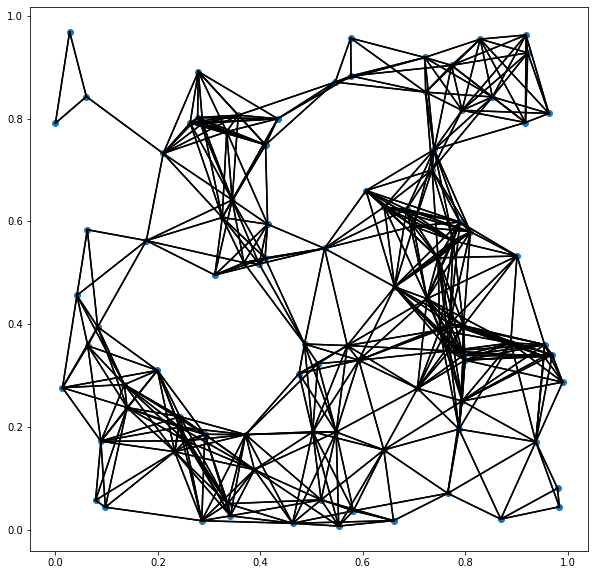

CPU times: user 1.91 s, sys: 15.5 ms, total: 1.92 s
Wall time: 1.92 s


In [12]:
%%time
a = Kvadrat(100, 0.2)
#print(a.drevo_najkrajsih_poti(0.5))

#a.narisi_tocke()
#a.narisi_bliznje()
#a.narisi_graf()
#plt.show()

a.narisi_tocke()
a.narisi_graf()
    
plt.show()


In [5]:
# TODO: dijkstra na bolj učinkovit način
# TODO: razmisli, če lahko na učinkovit način implemetiraš bliznje